In [1]:
import os
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import xarray as xr
from dateutil.relativedelta import relativedelta


from my_functions import read_obsfcstana_extend_datetime
from my_functions import read_obsfcstana

In [2]:
# expt_name = 'DAv7_M36_ASCAT_type_13_no_catdef_fp', 'DAv7_M36_ASCAT_type_2_fp_precip', 'DAv7_M36_ASCAT_type_13_test_catdef'
expt_name = 'snow_LS_OLv8_M36' #'LS_DAv8_M36'

start_date = datetime(2003, 1, 1)
end_date = datetime(2004, 1, 1)

start_date_str = start_date.strftime('%Y%m%d')
end_date_str = end_date.strftime('%Y%m%d')

# filename = f"{start_date_str}_{end_date_str}.npz"

In [3]:
# Produce with extended date_time
# Define the list of years
years = [str(year) for year in range(start_date.year, end_date.year + 1)]
print('years = ', years)

# Define the common file name start
file_name_start = expt_name+'.ens_avg.ldas_ObsFcstAna.20'

# Define the print flag
printflag = False

# Loop over the years
for i in range(len(years)-1):
    # Define the current and next year
    current_year = years[i]
    next_year = years[i+1]
    # Define the list of paths
    paths = []
    for month in range(1, 13):
        # path = f'/discover/nobackup/amfox/Experiments/{expt_name}/{expt_name}/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y{current_year}/M{month:02d}'
        # path = f'/discover/nobackup/amfox/Experiments/M21C_land_sweeper_DAv8_M36/{expt_name}/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y{current_year}/M{month:02d}'
        path = f'/discover/nobackup/amfox/Experiments/snow_M21C_test/{expt_name}/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y{current_year}/M{month:02d}'
        paths.append(path)

    #for month in range(1, 6):
    #    # path = f'/discover/nobackup/amfox/Experiments/{expt_name}/{expt_name}/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y{next_year}/M{month:02d}'
    #    path = f'/discover/nobackup/amfox/Experiments/M21C_land_sweeper_DAv8_M36/{expt_name}/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y{next_year}/M{month:02d}'
    #    paths.append(path)
    
    # Initialize lists to store the returned values
    date_times = []
    obs_species_list = []
    obs_tilenum_list = []
    obs_lon_list = []
    obs_lat_list = []
    obs_obs_list = []
    obs_fcst_list = []
    obs_ana_list = []
    
    # Loop over the paths for the current year
    for path in paths:
        # Print the current path
        print("Current path:", path)

        # Call the read_obsfcstana function for the current path
        date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana_extend_datetime(path, file_name_start, printflag)
        
        # Append the returned values to the lists
        date_times.append(date_time)
        obs_species_list.append(obs_species)
        obs_tilenum_list.append(obs_tilenum)
        obs_lon_list.append(obs_lon)
        obs_lat_list.append(obs_lat)
        obs_obs_list.append(obs_obs)
        obs_fcst_list.append(obs_fcst)
        obs_ana_list.append(obs_ana)
    
    # Combine the returned values from all paths
    date_time_out = np.concatenate(date_times)
    obs_species_out = np.concatenate(obs_species_list)
    obs_tilenum_out = np.concatenate(obs_tilenum_list)
    obs_lon_out = np.concatenate(obs_lon_list)
    obs_lat_out = np.concatenate(obs_lat_list)
    obs_obs_out = np.concatenate(obs_obs_list)
    obs_fcst_out = np.concatenate(obs_fcst_list)
    obs_ana_out = np.concatenate(obs_ana_list)
    
    # Save the returned values to a file including the current year in the file name
    np.savez(f'{expt_name}_{start_date_str}_{end_date_str}_obsfcstana_extend_datetime_{current_year}.npz',
             date_time=date_time_out,
             obs_species=obs_species_out,
             obs_tilenum=obs_tilenum_out,
             obs_lon=obs_lon_out,
             obs_lat=obs_lat_out,
             obs_obs=obs_obs_out,
             obs_fcst=obs_fcst_out,
             obs_ana=obs_ana_out)

years =  ['2003', '2004']
Current path: /discover/nobackup/amfox/Experiments/snow_M21C_test/snow_LS_OLv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2003/M01
Current path: /discover/nobackup/amfox/Experiments/snow_M21C_test/snow_LS_OLv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2003/M02
Current path: /discover/nobackup/amfox/Experiments/snow_M21C_test/snow_LS_OLv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2003/M03
Current path: /discover/nobackup/amfox/Experiments/snow_M21C_test/snow_LS_OLv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2003/M04
Current path: /discover/nobackup/amfox/Experiments/snow_M21C_test/snow_LS_OLv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2003/M05
Current path: /discover/nobackup/amfox/Experiments/snow_M21C_test/snow_LS_OLv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2003/M06
Current path: /discover/nobackup/amfox/Experiments/snow_M21C_test/snow_LS_OLv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2003/M07
Current path: /discover/nobac

In [4]:
# Directory path to search for NetCDF files
# root_directory = f'/discover/nobackup/amfox/Experiments/M21C_land_sweeper_DAv8_M36/{expt_name}/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/'
root_directory = f'/discover/nobackup/amfox/Experiments/snow_M21C_test/{expt_name}/output/SMAP_EASEv2_M36_GLOBAL/cat/ens0000/'

# Initialize an empty list to store the calculated sfmc_increment values
sfmc_increment_list = []
rzmc_increment_list = []
prmc_increment_list = []

time_stamp_list = []

current_date = start_date

while current_date <= end_date:
    year_month_directory = os.path.join(root_directory, 
                                        f"Y{current_date.year}", 
                                        f"M{current_date.month:02d}")
    print(year_month_directory)
    for filename in sorted(os.listdir(year_month_directory)):
        if filename.endswith('.nc4') and not filename.endswith('z.nc4') and filename.startswith(f'{expt_name}.inst3_1d_lndfcstana_Nt.2'):
            # Construct the full file path
            file_path = os.path.join(year_month_directory, filename)
            # Open the NetCDF file using xarray
            ds = xr.open_dataset(file_path)           

            # Extract time_stamp
            time_stamp = ds['time_stamp']
            
            time_stamp_list.append(time_stamp)
            
            # Extract the SFMC_ANA and SFMC_FCST variables
            sfmc_ana = ds['SFMC_ANA']
            sfmc_fcst = ds['SFMC_FCST']
            rzmc_ana = ds['RZMC_ANA']
            rzmc_fcst = ds['RZMC_FCST']
            prmc_ana = ds['PRMC_ANA']
            prmc_fcst = ds['PRMC_FCST']            
            
            # Calculate the sfmc_increment
            sfmc_increment = sfmc_ana - sfmc_fcst
            rzmc_increment = rzmc_ana - rzmc_fcst
            prmc_increment = prmc_ana - prmc_fcst
            
            # Append the sfmc_increment values to the list
            sfmc_increment_list.append(sfmc_increment)
            rzmc_increment_list.append(rzmc_increment)
            prmc_increment_list.append(prmc_increment)
            
            # Close the NetCDF file
            ds.close()
            
    current_date += relativedelta(months=1)

/discover/nobackup/amfox/Experiments/snow_M21C_test/snow_LS_OLv8_M36/output/SMAP_EASEv2_M36_GLOBAL/cat/ens0000/Y2003/M01
/discover/nobackup/amfox/Experiments/snow_M21C_test/snow_LS_OLv8_M36/output/SMAP_EASEv2_M36_GLOBAL/cat/ens0000/Y2003/M02
/discover/nobackup/amfox/Experiments/snow_M21C_test/snow_LS_OLv8_M36/output/SMAP_EASEv2_M36_GLOBAL/cat/ens0000/Y2003/M03
/discover/nobackup/amfox/Experiments/snow_M21C_test/snow_LS_OLv8_M36/output/SMAP_EASEv2_M36_GLOBAL/cat/ens0000/Y2003/M04
/discover/nobackup/amfox/Experiments/snow_M21C_test/snow_LS_OLv8_M36/output/SMAP_EASEv2_M36_GLOBAL/cat/ens0000/Y2003/M05
/discover/nobackup/amfox/Experiments/snow_M21C_test/snow_LS_OLv8_M36/output/SMAP_EASEv2_M36_GLOBAL/cat/ens0000/Y2003/M06
/discover/nobackup/amfox/Experiments/snow_M21C_test/snow_LS_OLv8_M36/output/SMAP_EASEv2_M36_GLOBAL/cat/ens0000/Y2003/M07
/discover/nobackup/amfox/Experiments/snow_M21C_test/snow_LS_OLv8_M36/output/SMAP_EASEv2_M36_GLOBAL/cat/ens0000/Y2003/M08
/discover/nobackup/amfox/Experim

In [5]:
# Concatenate the sfmc_increment values along the time dimension
print('working on sfmc_increment_concat')
sfmc_increment_concat = xr.concat(sfmc_increment_list, dim='time')
print('working on rzmc_increment_concat')
rzmc_increment_concat = xr.concat(rzmc_increment_list, dim='time')
print('working on prmc_increment_concat')
prmc_increment_concat = xr.concat(prmc_increment_list, dim='time')

time_stamp_concat = xr.concat(time_stamp_list, dim='time')

# Save both the concatenated sfmc_increment and rzmc_increment values to a new npsavez file
np.savez(f'{expt_name}_{start_date_str}_{end_date_str}_increments_concat.npz',
         time_stamp_concat=time_stamp_concat,
         sfmc_increment_concat=sfmc_increment_concat,
         rzmc_increment_concat=rzmc_increment_concat, 
         prmc_increment_concat=prmc_increment_concat)

working on sfmc_increment_concat
working on rzmc_increment_concat
working on prmc_increment_concat


In [6]:
data = np.load(f'{expt_name}_{start_date_str}_{end_date_str}_increments_concat.npz')
sfmc_increment_concat = data['sfmc_increment_concat']
rzmc_increment_concat = data['rzmc_increment_concat']
prmc_increment_concat = data['prmc_increment_concat']

# Find the location of values that meet the condition
incremented_values = (sfmc_increment_concat < -0.0002) | (sfmc_increment_concat > 0.0002)

# Calculate the mean, std, and count for sfmc_increment
mean_sfmc_increment = np.nanmean(np.where(incremented_values, sfmc_increment_concat, np.nan), axis=0)
std_sfmc_increment = np.nanstd(np.where(incremented_values, sfmc_increment_concat, np.nan), axis=0)
cnt_sfmc_increment = np.sum(incremented_values, axis=0)

# Calculate the mean and std for rzmc_increment
mean_rzmc_increment = np.nanmean(np.where(incremented_values, rzmc_increment_concat, np.nan), axis=0)
std_rzmc_increment = np.nanstd(np.where(incremented_values, rzmc_increment_concat, np.nan), axis=0)

# Calculate the mean and std for prmc_increment
mean_prmc_increment = np.nanmean(np.where(incremented_values, prmc_increment_concat, np.nan), axis=0)
std_prmc_increment = np.nanstd(np.where(incremented_values, prmc_increment_concat, np.nan), axis=0)

# Save a new npz file
np.savez(f'{expt_name}_{start_date_str}_{end_date_str}_increment_stats_v2.npz',
         mean_sfmc_increment=mean_sfmc_increment,
         std_sfmc_increment=std_sfmc_increment,
         cnt_sfmc_increment=cnt_sfmc_increment,
         mean_rzmc_increment=mean_rzmc_increment,
         std_rzmc_increment=std_rzmc_increment,
         mean_prmc_increment=mean_prmc_increment,
         std_prmc_increment=std_prmc_increment)

/gpfsm/dnb34/tdirs/batch/slurm.43974603.amfox/ipykernel_41351/1340810795.py:10: RuntimeWarning: Mean of empty slice
  mean_sfmc_increment = np.nanmean(np.where(incremented_values, sfmc_increment_concat, np.nan), axis=0)
/home/amfox/.conda/envs/diag/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/gpfsm/dnb34/tdirs/batch/slurm.43974603.amfox/ipykernel_41351/1340810795.py:15: RuntimeWarning: Mean of empty slice
  mean_rzmc_increment = np.nanmean(np.where(incremented_values, rzmc_increment_concat, np.nan), axis=0)
/gpfsm/dnb34/tdirs/batch/slurm.43974603.amfox/ipykernel_41351/1340810795.py:19: RuntimeWarning: Mean of empty slice
  mean_prmc_increment = np.nanmean(np.where(incremented_values, prmc_increment_concat, np.nan), axis=0)


In [7]:
# Find the location of values that meet the condition
incremented_values = (sfmc_increment_concat < -0.0002) | (sfmc_increment_concat > 0.0002)

# Calculate the mean and std sfmc_increment along the tile dimension for values that meet the condition
ts_mean_sfmc_increment = np.nanmean(np.where(incremented_values, sfmc_increment_concat, np.nan), axis=1)
ts_std_sfmc_increment = np.nanstd(np.where(incremented_values, sfmc_increment_concat, np.nan), axis=1)

# Calculate the mean and std rzmc_increment along the tile dimension for values that meet the condition
ts_mean_rzmc_increment = np.nanmean(np.where(incremented_values, rzmc_increment_concat, np.nan), axis=1)
ts_std_rzmc_increment = np.nanstd(np.where(incremented_values, rzmc_increment_concat, np.nan), axis=1)

# Calculate the mean and std prmc_increment along the tile dimension for values that meet the condition
ts_mean_prmc_increment = np.nanmean(np.where(incremented_values, prmc_increment_concat, np.nan), axis=1)
ts_std_prmc_increment = np.nanstd(np.where(incremented_values, prmc_increment_concat, np.nan), axis=1)

# Save a new npz file
np.savez(f'{expt_name}_{start_date_str}_{end_date_str}_increment_timeseries.npz',
         ts_mean_sfmc_increment=ts_mean_sfmc_increment,
         ts_std_sfmc_increment=ts_std_sfmc_increment,
         ts_mean_rzmc_increment=ts_mean_rzmc_increment,
         ts_std_rzmc_increment=ts_std_rzmc_increment,
         ts_mean_prmc_increment=ts_mean_prmc_increment,
         ts_std_prmc_increment=ts_std_prmc_increment)

/gpfsm/dnb34/tdirs/batch/slurm.43974603.amfox/ipykernel_41351/2319921507.py:5: RuntimeWarning: Mean of empty slice
  ts_mean_sfmc_increment = np.nanmean(np.where(incremented_values, sfmc_increment_concat, np.nan), axis=1)
/gpfsm/dnb34/tdirs/batch/slurm.43974603.amfox/ipykernel_41351/2319921507.py:9: RuntimeWarning: Mean of empty slice
  ts_mean_rzmc_increment = np.nanmean(np.where(incremented_values, rzmc_increment_concat, np.nan), axis=1)
/gpfsm/dnb34/tdirs/batch/slurm.43974603.amfox/ipykernel_41351/2319921507.py:13: RuntimeWarning: Mean of empty slice
  ts_mean_prmc_increment = np.nanmean(np.where(incremented_values, prmc_increment_concat, np.nan), axis=1)


In [8]:
# root_directory = f'/discover/nobackup/amfox/Experiments/M21C_land_sweeper_DAv8_M36/{expt_name}/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg'
root_directory = f'/discover/nobackup/amfox/Experiments/snow_M21C_test/{expt_name}/output/SMAP_EASEv2_M36_GLOBAL/cat/ens0000'

catdef_incr_list = []
srfexc_incr_list = []
rzexc_incr_list = []
total_incr_list = []
time_stamp_list = []
snow_incr_list = []

current_date = start_date

while current_date <= end_date:
    year_month_directory = os.path.join(root_directory, 
                                        f"Y{current_date.year}", 
                                        f"M{current_date.month:02d}")
    print(year_month_directory)
    for filename in sorted(os.listdir(year_month_directory)):
        if filename.endswith('.nc4') and not filename.endswith('z.nc4') and filename.startswith(f'{expt_name}.catch_progn_incr.2'):
            file_path = os.path.join(year_month_directory, filename)
            
            ds = xr.open_dataset(file_path)
            
            # Extract time_stamp
            time_stamp = ds['time_stamp']
            
            catdef_incr = ds['CATDEF_INCR']
            srfexc_incr = ds['SRFEXC_INCR']
            rzexc_incr = ds['RZEXC_INCR']
           
            total_incr = srfexc_incr + rzexc_incr - catdef_incr

            wesnn1_incr = ds['WESNN1_INCR']
            wesnn2_incr = ds['WESNN2_INCR']
            wesnn3_incr = ds['WESNN3_INCR']

            snow_incr = wesnn1_incr + wesnn2_incr + wesnn3_incr
            
            time_stamp_list.append(time_stamp)    
            catdef_incr_list.append(catdef_incr)
            srfexc_incr_list.append(srfexc_incr)
            rzexc_incr_list.append(rzexc_incr)
            total_incr_list.append(total_incr)
            snow_incr_list.append(snow_incr)

            ds.close()
    current_date += relativedelta(months=1)

/discover/nobackup/amfox/Experiments/snow_M21C_test/snow_LS_OLv8_M36/output/SMAP_EASEv2_M36_GLOBAL/cat/ens0000/Y2003/M01
/discover/nobackup/amfox/Experiments/snow_M21C_test/snow_LS_OLv8_M36/output/SMAP_EASEv2_M36_GLOBAL/cat/ens0000/Y2003/M02
/discover/nobackup/amfox/Experiments/snow_M21C_test/snow_LS_OLv8_M36/output/SMAP_EASEv2_M36_GLOBAL/cat/ens0000/Y2003/M03
/discover/nobackup/amfox/Experiments/snow_M21C_test/snow_LS_OLv8_M36/output/SMAP_EASEv2_M36_GLOBAL/cat/ens0000/Y2003/M04
/discover/nobackup/amfox/Experiments/snow_M21C_test/snow_LS_OLv8_M36/output/SMAP_EASEv2_M36_GLOBAL/cat/ens0000/Y2003/M05
/discover/nobackup/amfox/Experiments/snow_M21C_test/snow_LS_OLv8_M36/output/SMAP_EASEv2_M36_GLOBAL/cat/ens0000/Y2003/M06
/discover/nobackup/amfox/Experiments/snow_M21C_test/snow_LS_OLv8_M36/output/SMAP_EASEv2_M36_GLOBAL/cat/ens0000/Y2003/M07
/discover/nobackup/amfox/Experiments/snow_M21C_test/snow_LS_OLv8_M36/output/SMAP_EASEv2_M36_GLOBAL/cat/ens0000/Y2003/M08
/discover/nobackup/amfox/Experim

In [9]:
# Concatenate the sfmc_increment values along the time dimension
print('working on time_stamp_concat')
time_stamp_concat = xr.concat(time_stamp_list, dim='time')
print('working on catdef_incr')
catdef_incr_concat = xr.concat(catdef_incr_list, dim='time')
print('working on srfexc_incr')
srfexc_incr_concat = xr.concat(srfexc_incr_list, dim='time')
print('working on catdef_incr')
rzexc_incr_concat = xr.concat(rzexc_incr_list, dim='time')
print('working on total_incr')
total_incr_concat = xr.concat(total_incr_list, dim='time')
print('working on snow_incr')
snow_incr_concat = xr.concat(snow_incr_list, dim='time')

working on time_stamp_concat
working on catdef_incr
working on srfexc_incr
working on catdef_incr
working on total_incr
working on snow_incr


In [10]:
np.savez(f'{expt_name}_{start_date_str}_{end_date_str}_catch_progn_incr_concat.npz',
         catdef_incr_concat=catdef_incr_concat,
         srfexc_incr_concat=srfexc_incr_concat,
         rzexc_incr_concat=rzexc_incr_concat,
         total_incr_concat=total_incr_concat,
         snow_incr_concat=snow_incr_concat,
         time_stamp_concat=time_stamp_concat)

np.savez(f'{expt_name}_{start_date_str}_{end_date_str}_catch_progn_incr_concat_snow_only.npz',
         snow_incr_concat=snow_incr_concat,
         time_stamp_concat=time_stamp_concat)

In [11]:
# Initialize arrays to store results
ts_mean_catdef_incr = np.zeros(len(total_incr_concat['tile']))
ts_std_catdef_incr = np.zeros(len(total_incr_concat['tile']))
ts_mean_surfexc_incr = np.zeros(len(total_incr_concat['tile']))
ts_std_surfexc_incr = np.zeros(len(total_incr_concat['tile']))
ts_mean_rzexc_incr = np.zeros(len(total_incr_concat['tile']))
ts_std_rzexc_incr = np.zeros(len(total_incr_concat['tile']))
ts_mean_total_incr = np.zeros(len(total_incr_concat['tile']))
ts_std_total_incr = np.zeros(len(total_incr_concat['tile']))
number_of_incr = np.zeros(len(total_incr_concat['tile']))
ts_mean_snow_incr = np.zeros(len(total_incr_concat['tile']))
ts_std_snow_incr = np.zeros(len(total_incr_concat['tile']))
num_snow_incr = np.zeros(len(total_incr_concat['tile']))

# Vectorized operations
non_zero_catdef = np.where((catdef_incr_concat < -0.001) | (catdef_incr_concat > 0.001), catdef_incr_concat, np.nan)
non_zero_surfexc = np.where((srfexc_incr_concat < -0.0001) | (srfexc_incr_concat > 0.0001), srfexc_incr_concat, np.nan)
non_zero_rzexc = np.where((rzexc_incr_concat < -0.0001) | (srfexc_incr_concat > 0.0001), srfexc_incr_concat, np.nan)
non_zero_total = np.where((total_incr_concat < -0.0001) | (total_incr_concat > 0.0001), total_incr_concat, np.nan)
non_zero_snow = np.where((snow_incr_concat < -0.001) | (snow_incr_concat > 0.001), snow_incr_concat, np.nan)

# Calculate means and standard deviations
ts_mean_catdef_incr = np.nanmean(non_zero_catdef, axis=0)
ts_std_catdef_incr = np.nanstd(non_zero_catdef, axis=0)
ts_mean_surfexc_incr = np.nanmean(non_zero_surfexc, axis=0)
ts_std_surfexc_incr = np.nanstd(non_zero_surfexc, axis=0)
ts_mean_rzexc_incr = np.nanmean(non_zero_rzexc, axis=0)
ts_std_rzexc_incr = np.nanstd(non_zero_rzexc, axis=0)
ts_mean_total_incr = np.nanmean(non_zero_total, axis=0)
ts_std_total_incr = np.nanstd(non_zero_total, axis=0)
ts_mean_snow_incr = np.nanmean(non_zero_snow, axis=0)
ts_std_snow_incr = np.nanstd(non_zero_snow, axis=0)

# Count non-zero values
number_of_incr = np.sum(~np.isnan(non_zero_total), axis=0)
num_snow_incr = np.sum(~np.isnan(non_zero_snow), axis=0)
    

/gpfsm/dnb34/tdirs/batch/slurm.43974603.amfox/ipykernel_41351/280714108.py:23: RuntimeWarning: Mean of empty slice
  ts_mean_catdef_incr = np.nanmean(non_zero_catdef, axis=0)
/gpfsm/dnb34/tdirs/batch/slurm.43974603.amfox/ipykernel_41351/280714108.py:25: RuntimeWarning: Mean of empty slice
  ts_mean_surfexc_incr = np.nanmean(non_zero_surfexc, axis=0)
/gpfsm/dnb34/tdirs/batch/slurm.43974603.amfox/ipykernel_41351/280714108.py:27: RuntimeWarning: Mean of empty slice
  ts_mean_rzexc_incr = np.nanmean(non_zero_rzexc, axis=0)
/gpfsm/dnb34/tdirs/batch/slurm.43974603.amfox/ipykernel_41351/280714108.py:29: RuntimeWarning: Mean of empty slice
  ts_mean_total_incr = np.nanmean(non_zero_total, axis=0)
/gpfsm/dnb34/tdirs/batch/slurm.43974603.amfox/ipykernel_41351/280714108.py:31: RuntimeWarning: Mean of empty slice
  ts_mean_snow_incr = np.nanmean(non_zero_snow, axis=0)


In [12]:
np.savez(f'{expt_name}_{start_date_str}_{end_date_str}_catch_progn_incr_stats_v3.npz', 
         ts_mean_catdef_incr=ts_mean_catdef_incr,
         ts_std_catdef_incr=ts_std_catdef_incr,
         ts_mean_surfexc_incr=ts_mean_surfexc_incr,
         ts_std_surfexc_incr=ts_std_surfexc_incr,
         ts_mean_rzexc_incr=ts_mean_rzexc_incr,
         ts_std_rzexc_incr=ts_std_rzexc_incr,
         ts_mean_total_incr=ts_mean_total_incr,
         ts_std_total_incr=ts_std_total_incr,
         number_of_incr=number_of_incr,
         ts_mean_snow_incr=ts_mean_snow_incr,
         ts_std_snow_incr=ts_std_snow_incr,
        num_snow_incr=num_snow_incr)

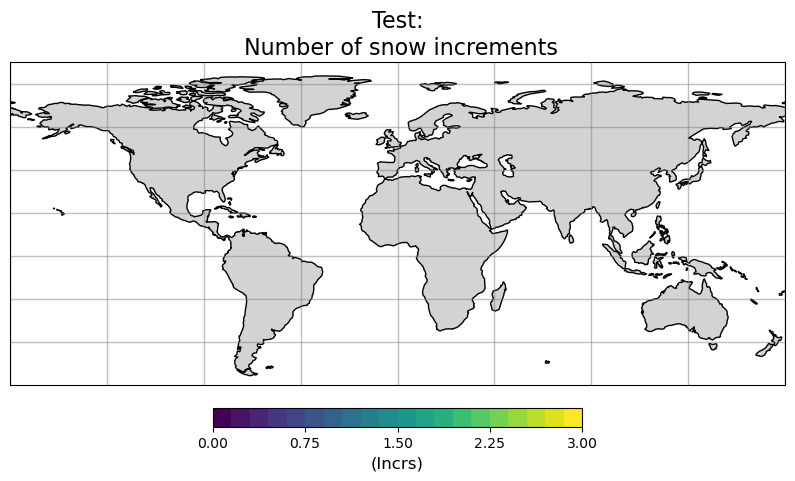

In [13]:
import xarray as xr
from mapper_functions import plot_global_tight

ds = xr.open_dataset('/discover/nobackup/amfox/Experiments/M21C_land_sweeper_DAv8_M36/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2003/M01/LS_DAv8_M36.catch_progn_incr.20030131.nc4')
lon = ds['lon']
lat = ds['lat']
n_tile = len(lat)

obarray = np.empty([n_tile, 3])
obarray.fill(np.nan)
obarray[:, 1] = lon
obarray[:, 2] = lat

obarray[:, 0] = ts_std_snow_incr
obarray[:, 0][obarray[:, 0] == 0] = np.nan
plot_global_tight(obarray,False,f'Test:\n Number of snow increments','(Incrs)', 0, 3) 



In [14]:
# root_directory = f'/discover/nobackup/amfox/Experiments/M21C_land_sweeper_DAv8_M36/{expt_name}/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg'
root_directory = f'/discover/nobackup/amfox/Experiments/snow_M21C_test/{expt_name}/output/SMAP_EASEv2_M36_GLOBAL/cat/ens0000'

sm_surface_list = []
sm_rootzone_list = []
sm_profile_list = []
precipitation_total_surface_flux_list = []
vegetation_greenness_fraction_list = []
leaf_area_index_list = []
time_stamp_list = []
snow_mass_list = []

current_date = start_date

while current_date <= end_date:
    year_month_directory = os.path.join(root_directory, 
                                        f"Y{current_date.year}", 
                                        f"M{current_date.month:02d}")
   # print(year_month_directory)
    for filename in sorted(os.listdir(year_month_directory)):
        if filename.endswith('.nc4') and filename.startswith(f'{expt_name}.tavg24_1d_lnd_Nt.2'):
            file_path = os.path.join(year_month_directory, filename)
            #if current_date.year == 2018 and current_date.month == 12:
            #  print(file_path)
            
            ds = xr.open_dataset(file_path)
            
            # Extract time_stamp
           
            sm_surface = ds['SFMC']
            sm_rootzone = ds['RZMC']
            sm_profile = ds['PRMC']
            precipitation_total_surface_flux = ds['PRECTOTCORRLAND']
            vegetation_greenness_fraction = ds['GRN']
            leaf_area_index = ds['LAI']
            snow_mass = ds['SNOMASLAND']
                        
            sm_surface_list.append(sm_surface)
            sm_rootzone_list.append(sm_rootzone)
            sm_profile_list.append(sm_profile)
            precipitation_total_surface_flux_list.append(precipitation_total_surface_flux)
            vegetation_greenness_fraction_list.append(vegetation_greenness_fraction)
            leaf_area_index_list.append(leaf_area_index)
            snow_mass_list.append(snow_mass)

            ds.close()
    current_date += relativedelta(months=1)

In [15]:
# Concatenate the sfmc_increment values along the time dimension
print('working on sm_surface_concat')
sm_surface_concat = xr.concat(sm_surface_list, dim='time')
print('working on sm_rootzone_concat')
sm_rootzone_concat = xr.concat(sm_rootzone_list, dim='time')
print('working on sm_profile_concat')
sm_profile_concat = xr.concat(sm_profile_list, dim='time')
print('working on precipitation_total_surface_flux_concat')
precipitation_total_surface_flux_concat = xr.concat(precipitation_total_surface_flux_list, dim='time')
print('working on vegetation_greenness_fraction_concat')
vegetation_greenness_fraction_concat = xr.concat(vegetation_greenness_fraction_list, dim='time')
print('working on leaf_area_index_concat')
leaf_area_index_concat = xr.concat(leaf_area_index_list, dim='time')
print('working on snow_mass')
snow_mass_concat = xr.concat(snow_mass_list, dim='time')

working on sm_surface_concat
working on sm_rootzone_concat
working on sm_profile_concat
working on precipitation_total_surface_flux_concat
working on vegetation_greenness_fraction_concat
working on leaf_area_index_concat
working on snow_mass


In [16]:
np.savez(f'{expt_name}_{start_date_str}_{end_date_str}_tavg24_1d_lnd_Nt_concat.npz',
         sm_surface_concat=sm_surface_concat,
         sm_rootzone_concat=sm_rootzone_concat,
         sm_profile_concat=sm_profile_concat,
         precipitation_total_surface_flux_concat=precipitation_total_surface_flux_concat,
         vegetation_greenness_fraction_concat=vegetation_greenness_fraction_concat,
         leaf_area_index_concat=leaf_area_index_concat,
         snow_mass_concat=snow_mass_concat)

In [17]:
# Calculate the mean, etc. for each tile along the time dimension
mean_sm_surface = np.mean(sm_surface_concat, axis=0)
std_sm_surface = np.std(sm_surface_concat, axis=0)
mean_sm_rootzone = np.mean(sm_rootzone_concat, axis=0)
std_sm_rootzone = np.std(sm_rootzone_concat, axis=0)
mean_sm_profile = np.mean(sm_profile_concat, axis=0)
std_sm_profile = np.std(sm_profile_concat, axis=0)
mean_precipitation_total_surface_flux = np.mean(precipitation_total_surface_flux_concat, axis=0)
mean_vegetation_greenness_fraction = np.mean(vegetation_greenness_fraction_concat, axis=0)
max_vegetation_greenness_fraction = np.max(vegetation_greenness_fraction_concat, axis=0)
mean_leaf_area_index = np.mean(leaf_area_index_concat, axis=0)
max_leaf_area_index = np.max(leaf_area_index_concat, axis=0)
mean_snow_mass_index = np.mean(snow_mass_concat, axis=0)
std_snow_mass_index = np.std(snow_mass_concat, axis=0)
max_snow_mass_index = np.max(snow_mass_concat, axis=0)

In [18]:
# Save both the concatenated sfmc_increment and rzmc_increment values to a new npsavez file
np.savez(f'{expt_name}_{start_date_str}_{end_date_str}_tavg24_1d_lnd_Nt_stats.npz', 
         mean_sm_surface=mean_sm_surface,
         std_sm_surface=std_sm_surface,
         mean_sm_rootzone=mean_sm_rootzone,
         std_sm_rootzone=std_sm_rootzone,
         mean_sm_profile=mean_sm_profile,
         std_sm_profile=std_sm_profile,
         mean_precipitation_total_surface_flux=mean_precipitation_total_surface_flux,
         mean_vegetation_greenness_fraction=mean_vegetation_greenness_fraction,
         max_vegetation_greenness_fraction=max_vegetation_greenness_fraction,
         mean_leaf_area_index=mean_leaf_area_index,
         max_leaf_area_index=max_leaf_area_index,
         mean_snow_mass_index=mean_snow_mass_index,
         std_snow_mass_index=std_snow_mass_index,
         max_snow_mass_index=max_snow_mass_index)

In [19]:
# Calculate the mean, etc. for each time step along the tile dimension
ts_mean_sm_surface = np.mean(sm_surface_concat, axis=1)
ts_std_sm_surface = np.std(sm_surface_concat, axis=1)
ts_mean_sm_rootzone = np.mean(sm_rootzone_concat, axis=1)
ts_std_sm_rootzone = np.std(sm_rootzone_concat, axis=1)
ts_mean_sm_profile = np.mean(sm_profile_concat, axis=1)
ts_std_sm_profile = np.std(sm_profile_concat, axis=1)
ts_mean_precipitation_total_surface_flux = np.mean(precipitation_total_surface_flux_concat, axis=1)
ts_mean_vegetation_greenness_fraction = np.mean(vegetation_greenness_fraction_concat, axis=1)
ts_max_vegetation_greenness_fraction = np.max(vegetation_greenness_fraction_concat, axis=1)
ts_mean_leaf_area_index = np.mean(leaf_area_index_concat, axis=1)
ts_max_leaf_area_index = np.max(leaf_area_index_concat, axis=1)
ts_mean_snow_mass_index = np.mean(snow_mass_concat, axis=1)
ts_std_snow_mass_index = np.std(snow_mass_concat, axis=1)
ts_max_snow_mass_index = np.max(snow_mass_concat, axis=1)

In [20]:
# Save the time series to a new npsavez file
np.savez(f'{expt_name}_{start_date_str}_{end_date_str}_tavg24_1d_lnd_Nt_timeseries.npz', 
         ts_mean_sm_surface=ts_mean_sm_surface,
         ts_std_sm_surface=ts_std_sm_surface,
         ts_mean_sm_rootzone=ts_mean_sm_rootzone,
         ts_std_sm_rootzone=ts_std_sm_rootzone,
         ts_mean_sm_profile=ts_mean_sm_profile,
         ts_std_sm_profile=ts_std_sm_profile,
         ts_mean_precipitation_total_surface_flux=ts_mean_precipitation_total_surface_flux,
         ts_mean_vegetation_greenness_fraction=ts_mean_vegetation_greenness_fraction,
         ts_max_vegetation_greenness_fraction=ts_max_vegetation_greenness_fraction,
         ts_mean_leaf_area_index=ts_mean_leaf_area_index,
         ts_max_leaf_area_index=ts_max_leaf_area_index,
         ts_mean_snow_mass_index=ts_mean_snow_mass_index,
         ts_std_snow_mass_index=ts_std_snow_mass_index,
         ts_max_snow_mass_index=ts_max_snow_mass_index)

In [21]:
# Calculate the daily statistics in observation space

# Define the path directory
# path_dir = f'/discover/nobackup/amfox/Experiments/M21C_land_sweeper_DAv8_M36/{expt_name}/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg'
path_dir = f'/discover/nobackup/amfox/Experiments/snow_M21C_test/{expt_name}/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg'

# Define the common file name start
file_name_start = f'{expt_name}.ens_avg.ldas_ObsFcstAna.'

# Define the print flag
printflag = False

# Initialize lists to store the mean values for each variable and the dates
dates_list = []

modis_obs_obs_count_list = []
modis_obs_obs_mean_list = []
modis_obs_fcst_mean_list = []
modis_obs_ana_mean_list = []
modis_omf_mean_list = []
modis_oma_mean_list = []
modis_omf_max_list = []
modis_omf_std_list = []
modis_oma_std_list = []

# Define the start and end dates
# start_date = datetime.strptime('20030401', '%Y%m%d')
# end_date = datetime.strptime('20040331', '%Y%m%d')

end_date -= timedelta(days=1)

# Loop over the dates
current_date = start_date
while current_date <= end_date:
    # Define the file name for the current date
    file_name = file_name_start + current_date.strftime('%Y%m%d')
    if file_name[-4:] == '0901':
        print('file_name = ', file_name)
    
    # Call the read_obsfcstana function for the current file
    date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path_dir, file_name, printflag)

    # Convert the lists to numpy arrays
    #c_obs_obs = np.array(obs_obs[np.array(obs_species) > 11])
    #c_obs_fcst = np.array(obs_fcst[np.array(obs_species) > 11])
    #c_obs_ana = np.array(obs_ana[np.array(obs_species) > 11])

    # Convert the lists to numpy arrays
    c_obs_obs = np.array(obs_obs)
    c_obs_fcst = np.array(obs_fcst)
    c_obs_ana = np.array(obs_ana)    
    
    # Calculate the mean values for the variables
    obs_obs_count = len(c_obs_obs)
    obs_obs_mean = np.mean(c_obs_obs)
    obs_fcst_mean = np.mean(c_obs_fcst)
    obs_ana_mean = np.mean(c_obs_ana)
    omf_mean = np.mean(c_obs_obs - c_obs_fcst)
    oma_mean = np.mean(c_obs_obs - c_obs_ana)

    # Calculate the maximum absolute difference between obs_obs and obs_fcst
    if c_obs_fcst.size > 0 and c_obs_obs.size > 0 and c_obs_fcst.shape == c_obs_obs.shape:
        omf_max = np.max(abs(c_obs_obs - c_obs_fcst))
    else:
        omf_max = np.nan
        print('Current date = ', current_date)
    omf_std = np.std(c_obs_obs - c_obs_fcst)
    oma_std = np.std(c_obs_obs - c_obs_ana)

    # Append the mean values to the lists
    modis_obs_obs_count_list.append(obs_obs_count)
    modis_obs_obs_mean_list.append(obs_obs_mean)
    modis_obs_fcst_mean_list.append(obs_fcst_mean)
    modis_obs_ana_mean_list.append(obs_ana_mean)
    modis_omf_mean_list.append(omf_mean)
    modis_oma_mean_list.append(oma_mean)
    modis_omf_max_list.append(omf_max)
    modis_omf_std_list.append(omf_std)
    modis_oma_std_list.append(oma_std)
        
    # Append the current date to the dates list
    dates_list.append(current_date.strftime('%Y%m%d'))

    # Increment the current date by one day
    current_date += timedelta(days=1)

end_date += timedelta(days=1)

file_name =  snow_LS_OLv8_M36.ens_avg.ldas_ObsFcstAna.20030901


In [22]:
np.savez(f'{expt_name}_{start_date_str}_{end_date_str}_OmF_ts.npz',
         dates_list=dates_list,
         modis_obs_obs_count_list=modis_obs_obs_count_list,
         modis_obs_obs_mean_list=modis_obs_obs_mean_list,
         modis_obs_fcst_mean_list=modis_obs_fcst_mean_list,
         modis_obs_ana_mean_list=modis_obs_ana_mean_list,
         modis_omf_mean_list=modis_omf_mean_list,
         modis_oma_mean_list=modis_oma_mean_list,
         modis_omf_max_list=modis_omf_max_list,
         modis_omf_std_list=modis_omf_std_list,
         modis_oma_std_list=modis_oma_std_list)

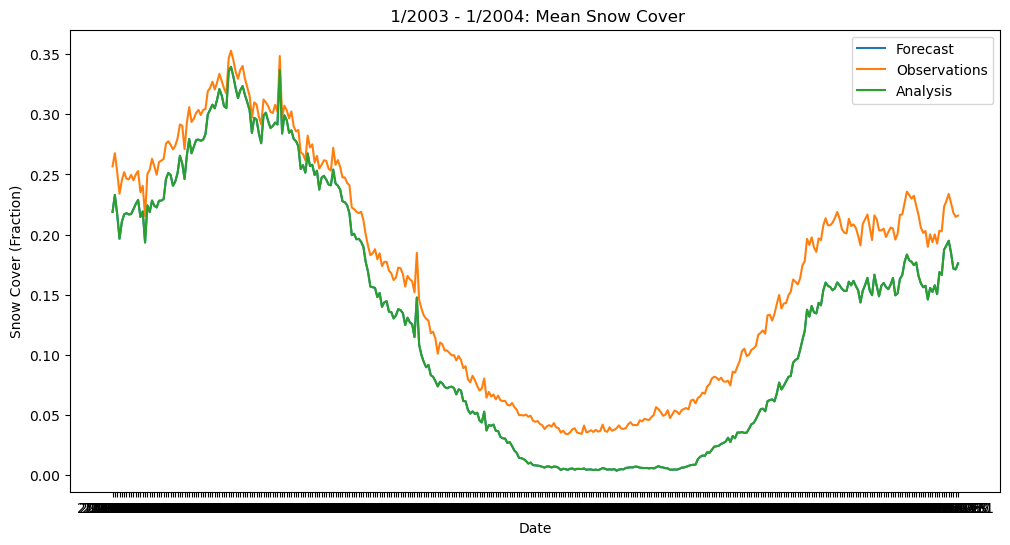

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(dates_list, modis_obs_fcst_mean_list, label='Forecast')
plt.plot(dates_list, modis_obs_obs_mean_list, label='Observations')
plt.plot(dates_list, modis_obs_ana_mean_list, label='Analysis')
plt.xlabel('Date')
plt.ylabel('Snow Cover (Fraction)')
plt.title(f' 1/2003 - 1/2004: Mean Snow Cover')
plt.legend()